In [4]:
classes = {0: "L", 1: "O", 2: "V", 3: "E"}
classes

{0: 'L', 1: 'O', 2: 'V', 3: 'E'}

In [5]:
import torch


x = torch.Tensor(
    [
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
    ]
)
x

tensor([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.]])

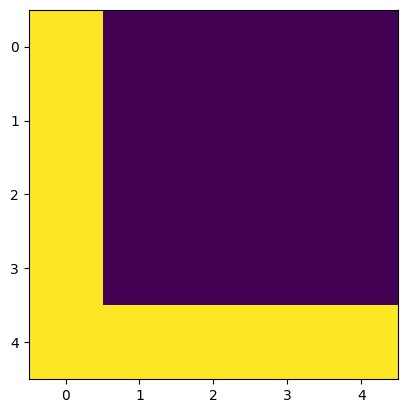

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x)
plt.show()

In [7]:
love = torch.Tensor(
    [
        [
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 1, 1, 1, 1],
        ],
        [
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1],
            [0, 1, 1, 1, 0],
            [0, 0, 1, 0, 0],
        ],
        [
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0],
            [1, 1, 1, 1, 1],
        ],
    ]
)
love

tensor([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 1., 1., 1., 1.]],

        [[1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [1., 0., 0., 0., 1.],
         [0., 1., 1., 1., 0.],
         [0., 0., 1., 0., 0.]],

        [[1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.],
         [1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1.]]])

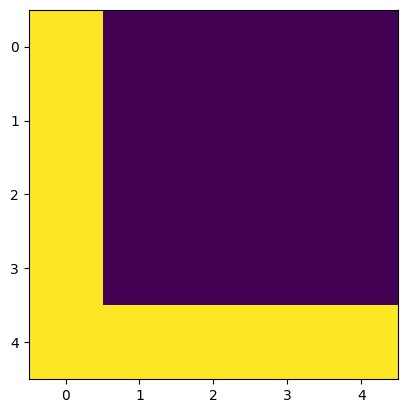

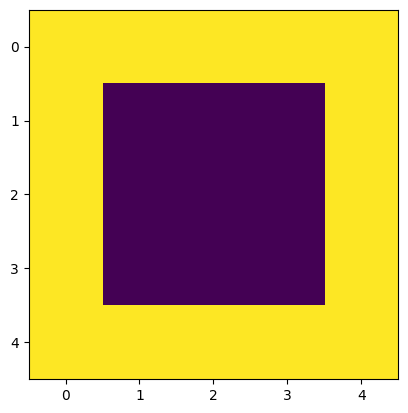

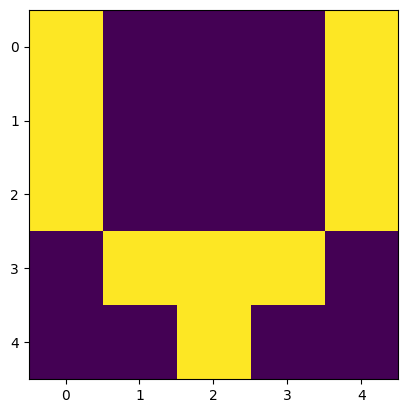

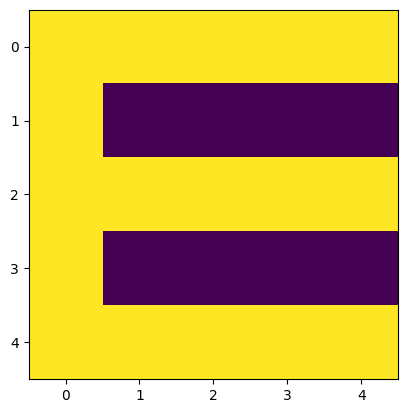

In [8]:
plt.imshow(love[0])
plt.show()
plt.imshow(love[1])
plt.show()
plt.imshow(love[2])
plt.show()
plt.imshow(love[3])
plt.show()

In [9]:
y = torch.tensor([0, 1, 2, 3])
y

tensor([0, 1, 2, 3])

In [10]:
print(classes[y[0].item()])
print(classes[y[1].item()])
print(classes[y[2].item()])
print(classes[y[3].item()])

L
O
V
E


In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Dense(nn.Module):
    def __init__(self):
        super().__init__()
        # 入力層(25: 5*5の画像)
        self.fc1 = nn.Linear(25, 32)
        # 隠れ層
        self.fc2 = nn.Linear(32, 32)
        # 出力層（4: LOVEの4文字）
        self.fc3 = nn.Linear(32, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
net = Dense()

In [18]:
net(love.view(-1, 25))

tensor([[ 1.0038e-01, -3.4658e-02,  1.8618e-02, -4.2269e-02],
        [ 5.8052e-02, -7.9580e-02,  3.2051e-02, -1.2221e-01],
        [ 9.5511e-02, -5.8826e-02,  3.2132e-02, -8.3650e-02],
        [ 6.3825e-02, -6.8236e-02,  8.6233e-05, -1.1246e-01]],
       grad_fn=<AddmmBackward0>)

In [20]:
net(love.view(-1, 25)).shape

torch.Size([4, 4])

In [23]:
import torch.optim as optim

# 分類:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
epochs = 100

In [46]:
from tqdm import tqdm

losses = []
accuracies = []
recalls = []
precisions = []

for epoch in tqdm(range(epochs)):
    # 勾配の初期化
    optimizer.zero_grad()
    # 推論
    outputs = net.forward(love.view(-1, 25))
    # 損失計算
    loss = loss_fn(outputs, y)
    # 勾配計算
    loss.backward()
    # 重み更新
    optimizer.step()
    losses.append(loss)

    _, predicted = torch.max(outputs, 1)

    # 精度の計算
    correct = (predicted == y).sum().item()
    accuracy = correct / y.size(0)
    accuracies.append(accuracy)

    # 再現率と適合率の計算（クラスごとに計算）
    true_positives = torch.zeros(4)
    false_positives = torch.zeros(4)
    false_negatives = torch.zeros(4)

    for i in range(4):
        true_positives[i] = ((predicted == i) & (y == i)).sum().item()
        false_positives[i] = ((predicted == i) & (y != i)).sum().item()
        false_negatives[i] = ((predicted != i) & (y == i)).sum().item()

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    # NaNを回避
    precision[torch.isnan(precision)] = 0.0
    recall[torch.isnan(recall)] = 0.0

    # 平均値を計算
    precisions.append(precision.mean().item())
    recalls.append(recall.mean().item())

100%|██████████| 100/100 [00:00<00:00, 974.52it/s]


In [47]:
type(losses)

list

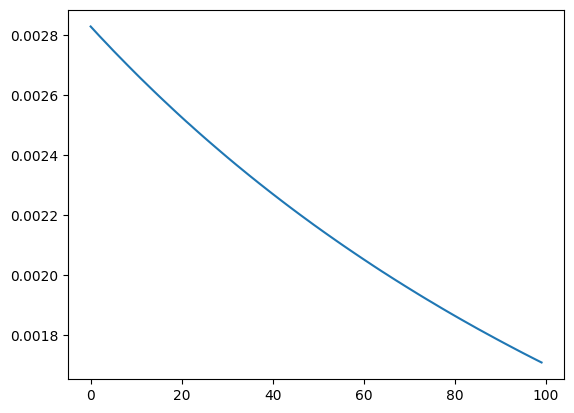

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

losses = torch.tensor(losses)
plt.plot(losses)
plt.show()

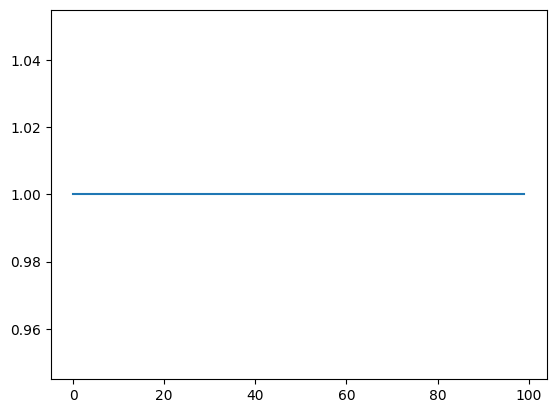

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

accuracies = torch.tensor(accuracies)
plt.plot(accuracies)
plt.show()